# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
import glob
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose
from torchvision import models
import os
import natsort
from PIL import Image
from torch.utils.data import SubsetRandomSampler
from IPython.display import clear_output
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
# You may add any imports you need

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/ИАД /ДЗ/dataset.zip'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/dataset/val/class_101/00048.jpg  
  inflating: dataset/dataset/val/class_101/00049.jpg  
   creating: dataset/dataset/val/class_102/
  inflating: dataset/dataset/val/class_102/00000.jpg  
  inflating: dataset/dataset/val/class_102/00001.jpg  
  inflating: dataset/dataset/val/class_102/00002.jpg  
  inflating: dataset/dataset/val/class_102/00003.jpg  
  inflating: dataset/dataset/val/class_102/00004.jpg  
  inflating: dataset/dataset/val/class_102/00005.jpg  
  inflating: dataset/dataset/val/class_102/00006.jpg  
  inflating: dataset/dataset/val/class_102/00007.jpg  
  inflating: dataset/dataset/val/class_102/00008.jpg  
  inflating: dataset/dataset/val/class_102/00009.jpg  
  inflating: dataset/dataset/val/class_102/00010.jpg  
  inflating: dataset/dataset/val/class_102/00011.jpg  
  inflating: dataset/dataset/val/class_102/00012.jpg  
  inflating: dataset/dataset/val/class_102/00013.jpg  
  inflat

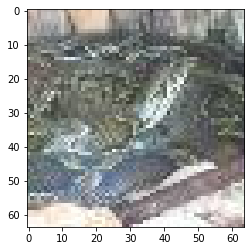

In [ ]:
file = np.random.choice(glob.glob("/content/dataset/dataset/train/*/*.jpg"))
plt.imshow(plt.imread(file))
plt.show()

In [ ]:
def train(model, train_dataloader, eval_dataloader, criterion ,optimizer, device, epochs, scheduler):
  model.to(device)
  loss = criterion
  best_loss = []
  best_accuracy = []
  for_plot_x = []
  for_plot_y = []
  for_plot_x_test = []
  for_plot_y_test = []
  for_plot_x_test1 = []
  for_plot_y_test1 = []
  for_plot_x1 = []
  for_plot_y1 = []
  all_test = 0
  k = 0
  model.train()
  for epoch in range(epochs):
      current_loss = 0
      current_loss1 = 0
      right_answers = 0
      all_answers = 0
      i = 0
      loss_test = 0
      cnt_test = 0
      for batch in tqdm(train_dataloader):
          imgs, cls = batch
          imgs, cls = imgs.to('cuda'), cls.to('cuda')
          optimizer.zero_grad()
          y_pred = model(imgs)
          output = loss(y_pred, cls)
          output.backward()
          optimizer.step()

          values, indicies  = y_pred.max(axis =1)
          right_answers = ((indicies - cls)==0).sum().item()
          all_answers = len(indicies)
          current_accuracy = right_answers/all_answers
          current_loss += output.item()
          current_loss1 += output.item()
          if i % 10 == 9:
                for_plot_x.append(k + (i+1))
                for_plot_y.append(current_loss1/10)
                for_plot_x1.append(k + (i+1))
                for_plot_y1.append(current_accuracy)
                current_loss1 = 0
          if i % 20 == 19:
                print('[{},{}], loss_train:{}, accuracy_train:{}'.format(epoch + 1, i + 1, current_loss/20, current_accuracy ))
                current_loss = 0
                
          
          i+=1
      k +=i
      model.eval()
      with torch.no_grad():
        accuracy_list = []
        for batch in eval_dataloader:
          imgs, cls = batch
          imgs, cls = imgs.to('cuda'), cls.to('cuda')
          y_pred = model(imgs)
          values, indicies  = y_pred.max(axis =1)
          accuracy = accuracy_score(indicies.to('cpu').numpy(),cls.to('cpu').numpy())
          accuracy_list.append(accuracy)
          output1 = loss(y_pred, cls)
          loss_test += output1.item()
          cnt_test += 1
        for_plot_y_test1.append(np.array(accuracy_list).mean())
        for_plot_x_test1.append(k)
        for_plot_x_test.append(k)
        for_plot_y_test.append(loss_test/cnt_test)
      clear_output()
      scheduler.step()
      fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
      ax[0].scatter(for_plot_x, for_plot_y)
      ax[0].scatter(for_plot_x_test,for_plot_y_test, s = 10**2)
      ax[0].set_title('Loss')
      ax[0].set_xlabel('Step number')
      ax[0].set_ylabel('Loss')
      ax[0].legend(('train', 'evaluation'), loc='upper right', shadow=True)
      ax[1].scatter(for_plot_x1, for_plot_y1)
      ax[1].scatter(for_plot_x_test1,for_plot_y_test1, s = 10**2)
      ax[1].set_title('Accuracy')
      ax[1].set_xlabel('Step number')
      ax[1].set_ylabel('Accuracy')
      ax[1].legend(('train', 'evaluation'), loc='lower right', shadow=True)
      plt.show()
      print('Loss last batch train:{}'.format(output.item()))
      print('Loss_evaluation:{}'.format(loss_test/cnt_test))
      print('Accuracy last batch train:{}'.format(current_accuracy))
      print('Accuracy_evaluation:{}'.format(np.array(accuracy_list).mean()))

In [ ]:
def predict(model, val_dataloader, criterion, device="cuda:0"):
      model.eval()
      losses = []
      predicted_classes = []
      true_classes = []
      with torch.no_grad():
        for batch in tqdm(val_dataloader):
          imgs, cls = batch
          imgs, cls = imgs.to(device), cls.to(device)
          y_pred = model(imgs)
          values, indicies  = y_pred.max(axis =1)
          predicted_classes.append(indicies)
          true_classes.append(cls)
          output = criterion(y_pred, cls)
          losses.append(output.item())
      predicted = []
      true = []
      for i in tqdm(predicted_classes):
        for j in i:
          predicted.append(j.to('cpu'))
      for n in true_classes:
        for k in n:
          true.append(k.to('cpu'))
      return losses, predicted, true

In [ ]:
import PIL
transforms_train = Compose([ torchvision.transforms.Resize((224,224)),
    ToTensor(), 
    torchvision.transforms.RandomErasing(p=0.05, scale = (0.1, 0.3)),
    Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ])
transforms_val = Compose([ torchvision.transforms.Resize((224,224)),
    ToTensor(), 
    Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ])

train_dataset = ImageFolder(root= "/content/dataset/dataset/train", transform=transforms_train)
val_dataset = ImageFolder(root= "/content/dataset/dataset/val", transform=transforms_val)
sampler = SubsetRandomSampler(torch.randperm(len(train_dataset)))
sampler1 = SubsetRandomSampler(torch.randperm(len(val_dataset)))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, sampler = sampler )
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = 32 , sampler = sampler1)

In [ ]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


Тренировки

In [ ]:
model = models.resnext101_32x8d(pretrained=True)
for param in model.parameters():
   param.requires_grad = False
model.fc = nn.Linear(2048,200)
optimizer = torch.optim.Adam(model.fc.parameters())
criterion = nn.CrossEntropyLoss()
lmbda = lambda epoch: 0.3
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
n_epochs = 2
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

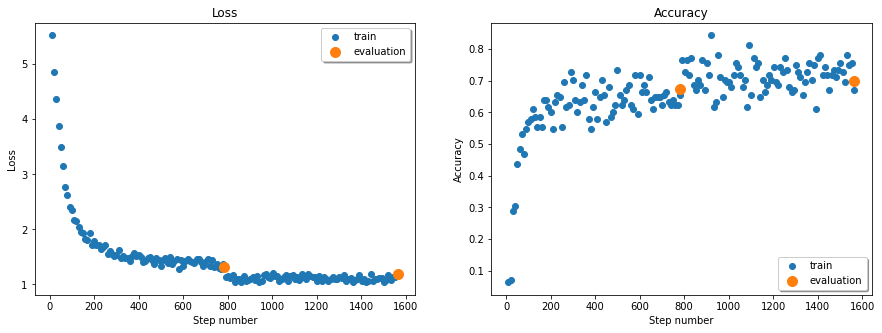

Loss last batch train:0.966423749923706
Loss_evaluation:1.1871742390976927
Accuracy last batch train:0.71875
Accuracy_evaluation:0.6999800319488818
CPU times: user 31min 57s, sys: 18min 5s, total: 50min 3s
Wall time: 50min 2s


In [ ]:
%%time
train(model, train_dataloader, val_dataloader, criterion ,optimizer, device, n_epochs, scheduler)

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")


tests passed


После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))


Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: Для достиженния необходимого порога в 44% качества в принципе не нужно большое количество экспериментов. Достаточным будет сделать необходимые аугментации, которые требуются для запуска предобученных моделей из torchvision, то есть нормализация и ресайз с требуемыми параметрами.Добавление большого числа аугментаций здесь особо не дало улучшения качества, которое и так отличное в сравнении с поставленной задачей. Поэтому оставлено было лишь случайное стирание части (от 10 до 30%) изображения с вероятностью 0,05. Однако добиться значительного улучшения качества позволяет выбор модели, среди множества предобученных resnext101_32x8d показал самые лучшие результаты на валидации. Поскольку датасет большой и качественный, то достичь высокого качества можно уже за 1-2 эпохи обучения, хотя с не самым быстрым GPU это уже долго

Использованные источники:


*   https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py
*   https://discuss.pytorch.org/t/how-to-get-a-part-of-datasets/82161
*   https://towardsdatascience.com/pytorch-basics-sampling-samplers-2a0f29f0bf2a
*   https://pytorch.org/docs/stable/optim.html
*   https://pytorch.org/docs/stable/torchvision/models.html
*   Семинары



## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import Dataset, DataLoader

In [2]:
# we will need this library to process the labeling
! pip install xmltodict

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import xmltodict, json

In [5]:
!unzip '/content/drive/My Drive/ИАД /ДЗ/archive.zip'

Archive:  /content/drive/My Drive/ИАД /ДЗ/archive.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple_84.jpg  
  inflating: test_zip/test/apple_84.xml  
  inflating: test_zip/test/apple_85.jpg  
  inflating: test_zip/test/apple_85.xml  
  inflating: test_zip/test/apple_86.jpg  
  inflating: test_zip/test/apple_86.xml  
  inflating: test_zip/test/apple_87.jpg  
  inflating: test_zip/test/apple_87.xml  
  inflating: test_zip/

Датасет мы за вас написали.

In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from tqdm.notebook import tqdm
import albumentations as A
import cv2
from albumentations.pytorch.transforms import ToTensor
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from IPython.display import clear_output
from torch.utils.data import SubsetRandomSampler
from albumentations import (
    HorizontalFlip, ShiftScaleRotate, RandomRotate90,
    Cutout, Flip, OneOf, Compose
)
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [5]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in tqdm(enumerate(test_loader)):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes
        
    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [6]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.train()
    n = 0
    global_loss = 0
    x = []
    y = []
    for images, targets in tqdm(train_dataloader):
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 5 == 0:
            x.append(n)
            y.append(global_loss/n)
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return x, y
#Source: семинар 7

def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    k = 0
    for_plot_x = []
    for_plot_y = []
    for_plot_x1 = []
    for_plot_y1 = []
    for epoch in range(n_epochs):
        model.train()
        x, y = train_one_epoch(model, train_dataloader, optimizer, device=device)
        for_plot_x.extend(list(np.array(x)+k*120))
        for_plot_y.extend(y)
        clear_output()
        model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {}".format(a))        
        k+=1
        for_plot_x1.append(k)
        for_plot_y1.append(a)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
        ax[0].scatter(for_plot_x, for_plot_y)
        ax[0].set_title('Loss')
        ax[0].set_xlabel('Step number')
        ax[0].set_ylabel('Loss')
        ax[1].scatter(for_plot_x1, for_plot_y1, c='orange')
        ax[1].set_title('AUC ON TEST')
        ax[1].set_xlabel('Epoch number')
        ax[1].set_ylabel('AUC')
        plt.show()
        if a > 0.91:
          print('Yes, we did it!!!')
          break

In [7]:
def get_detection_model(num_classes):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model


Поскольку фрукты достаточно однородные по цвету объекты внутри класса, то цветовые аугментации вряд ли увеличат качество, скорее даже ухудшат, поэтому реальную пользу могут принести аугментации с поворотами и перевортами, так как фрукты могут быть расположены различно. Но очень частое и совместное использование агментаций - не самый лучший вариант, поскольку тогда исходные картинки из датасета будут встречаться редко.

In [8]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_transform = A.Compose([OneOf([
    A.RandomRotate90(p = 0.25),
    A.Flip(p=0.1),
    OneOf([A.HorizontalFlip(),
    A.VerticalFlip(),
    A.ShiftScaleRotate()], p =0.75),
    A.Cutout(num_holes=10),
    ], p=0.3),
    ToTensor()])

val_transform = A.Compose([
    ToTensor()
])
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION


train_dataset = FruitDataset("/content/train_zip/train", transform= train_transform)
val_dataset = FruitDataset("/content/test_zip/test", transform=val_transform)

sampler = SubsetRandomSampler(np.random.RandomState(seed=5).permutation(np.arange(0,len(train_dataset))))

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2, sampler = sampler, collate_fn=collate_fn)
val_dataloader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

In [9]:
model = get_detection_model(num_classes = 4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00002)
n_epochs = 20
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)


AUC ON TEST: 0.9172434942926763


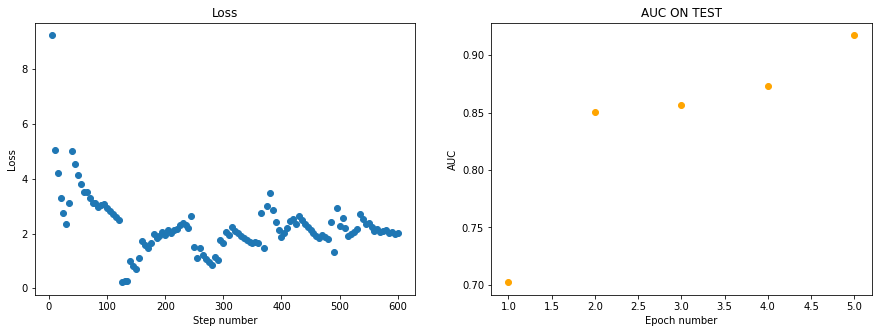

Yes, we did it!!!
CPU times: user 5min 19s, sys: 3min 3s, total: 8min 22s
Wall time: 8min 24s


In [10]:
%%time
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

__Выведите итоговое качество модели__.

In [11]:
auc = evaluate(model, val_dataloader, device= device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Оценка за это задание составит 4 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


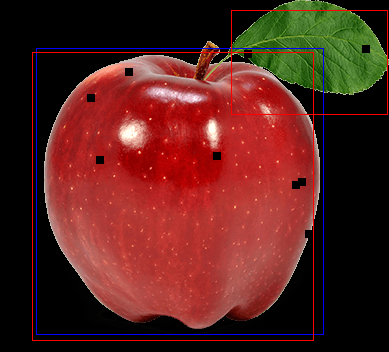

In [13]:
from PIL import ImageDraw

i = np.random.randint(0,len(train_dataset),size =2)
image, labels = train_dataset[i[0]]
image1, labels1 = train_dataset[i[1]]
pred = model(image.unsqueeze(0).to(device))
pred1 = model(image1.unsqueeze(0).to(device))

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue')
    
for box in pred[0]['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

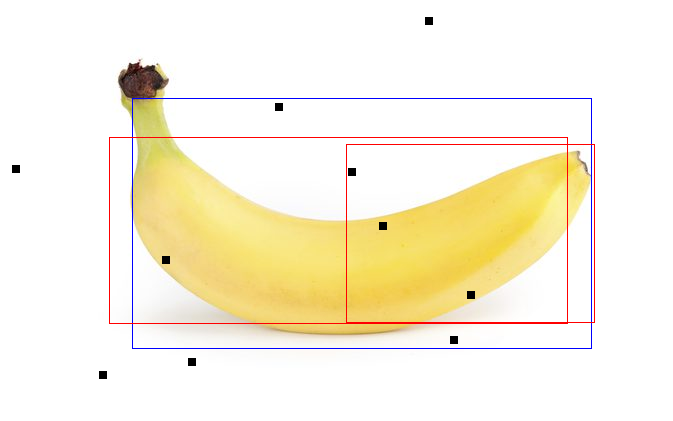

In [14]:
image1 = torchvision.transforms.ToPILImage()(image1)
draw = ImageDraw.Draw(image1)
for box in labels1['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue')
    
for box in pred1[0]['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image1

Использованные источники:



*   https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
*   https://github.com/albumentations-team/albumentations_examples#augmentations-examples
*   Семинар 7



## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

Достичь указанного качества удалось, отчет о проделанных экспериментах можно прочитать в части с классификацией



## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

![](https://drive.google.com/uc?export=view&id=1Wu1lAeaqe5wH6U9Z1baS0iJV4jP_6rkG)

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.

В целом прикольно, в этот раз действительно проще, чем в прошлый, но творчества хотелось бы, наверное, чуть больше, потому что в этом ноутбуке аугментации не сильно улучшают качество, и из-за этого задача скорее сводилась к "как не испортить, что уже есть, и добить пару процентов". Картиночки в первом датасете порадовали, еще б качество получше...